In [59]:
"""Create parameters.py and load it"""

# Directory for .inp file:
path = 'D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp'

# import libraries:
import importlib   # For reloading your own files
from termcolor import colored   # for colored error messages
# my own files:
try:
    import inp_data_extractor as inp
except:
    try:
        import Bubble_dynamics_simulation.inp_data_extractor as inp
    except:
        print(colored(f'Error, \'inp_data_extractor.py\' not found', 'red'))
importlib.reload(inp)   # reload changes you made
inp.extract(path)

import parameters as par   # numeric constants and coefficents
importlib.reload(par)   # reload changes you made
print(par.model)

path=D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp
Note, lambda value for specie 'H' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH2' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N' is not in data.py: 0.0 is used
Note, lambda value for specie 'NNH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H4' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H3' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H2' is not in data.py: 0.0 is used
Note, lambda value for specie 'H2NN' is not in data.py: 0.0 is used
Warning, third body 'H2O' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
Warning, third body 'AR' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
model: chem_Otomo2018_without_O
File 'parameters.py' succesfully created
chem_O

In [64]:
"""Libraries"""

# for plotting:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

import numpy as np   # matrices, math
import os    # file management
import pandas as pd   # data frames
import importlib   # for reloading your own files
from termcolor import colored   # for colored error messages

# my own file:
already_imported = 'de' in globals()
try:
    import full_bubble_model as de
except:
    try:
        import Bubble_dynamics_simulation.full_bubble_model as de
    except:
        print(colored(f'Error, \'full_bubble_model.py\' not found', 'red'))
if already_imported: importlib.reload(de)   # reload changes you made

model: chem_Otomo2018_without_O
target specie: NH3
excitation: sin_impulse (control parameters: ['p_A', 'freq', 'n'])
enable heat transfer: True	enable evaporation: False	enable reactions: True	enable dissipated energy: True


In [63]:
"""Base settings"""

# r-string will not convert \n to new line
directory = r'D:\parameter_studies\Excitation_search\sin_sqr_inverse'
file_base_name = 'output_'

In [53]:
"""Load all CSV files from directory into a dataframe (all_data)"""

# create a dataframe
all_data = pd.DataFrame()
num = 0
print(f'Found files:')

# iterate trough all files in directory (including subdirectories)
for (root, dirs, files) in os.walk(directory):
    for file in files:
        # ignore python rubish
        if 'ipynb_checkpoints' in root:
            continue
        # check if it's a CSV starting with file_base_name
        if file[-4:] != '.csv':
            continue
        if file[:len(file_base_name)] != file_base_name:
            continue

        # read file
        num += 1
        current_data = pd.read_csv(os.path.join(root, file))

        # Cast object-dtype columns with all-bool values to bool dtype
        for col in current_data.columns:
            if current_data[col].dtype == 'object' and all(current_data[col].dropna().map(lambda x: isinstance(x, bool))):
                current_data[col] = current_data[col].astype(bool)

        print(f'\t{file: <24} ({current_data.shape[0]: >4} rows)')
        all_data = pd.concat([all_data, current_data])
    
    
# Print some stats:
print(f'_______________________________________')
print(f'total number of files: {num}')
total = all_data.shape[0]
print(f'{"total:": <10} {total: < 8} rows   ( 100.00 %)')

# Print errors
def matches(error, error_code):
    errors, success = de.get_errors(error_code)
    return error in errors

for error in de.error_codes.keys():
    digit = -1; place = -1
    for i in range(10):
        if str(i) in error:
            digit = i
            place = len(error) - error.find(str(i)) - 1

    if digit < 0 and place < 0:
        print(colored(f'Error: invalid error code: {error}', 'red'))
        continue
    num = all_data.loc[(all_data['error_code'] // (10**place) % 10) == digit].shape[0]
    if error == 'x0x':
        num  -= all_data.loc[(all_data['error_code'] % 10) == 0].shape[0] # xx0
    print(f'{error + ":": <10} {num: < 8} rows   ({(100*num/total): 7.2f} %)\t' + colored(de.error_codes[error]['describtion'], de.error_codes[error]['color']))



#for error_code in range(7):
#    num = all_data.loc[(all_data['error_code'] == error_code)].shape[0]
#    print(f'error code {error_code}: {num} rows   ({(100*num/total):.2f} %)')
#num = all_data.loc[(all_data['T_max'] > 6000.0)].shape[0]
#print(f'too hot: {num} rows    ({100*num/total:.2f} %)')
print(f'_______________________________________')

Found files:
	output_32.csv            (5000 rows)
	output_33.csv            ( 480 rows)
	output_34.csv            ( 250 rows)
	output_35.csv            ( 385 rows)
	output_36.csv            ( 305 rows)
	output_37.csv            ( 493 rows)
	output_38.csv            ( 336 rows)
	output_39.csv            ( 561 rows)
	output_40.csv            ( 426 rows)
	output_41.csv            ( 576 rows)
	output_42.csv            ( 136 rows)
	output_43.csv            ( 372 rows)
	output_44.csv            ( 450 rows)
	output_45.csv            ( 348 rows)
	output_46.csv            ( 360 rows)
	output_47.csv            ( 369 rows)
	output_48.csv            ( 285 rows)
	output_49.csv            ( 745 rows)
	output_50.csv            ( 347 rows)
	output_51.csv            ( 562 rows)
	output_52.csv            ( 591 rows)
	output_53.csv            (1929 rows)
	output_54.csv            ( 377 rows)
	output_55.csv            ( 630 rows)
	output_56.csv            ( 695 rows)
	output_57.csv            ( 425 rows)

In [54]:
"""Locate valid (good_data) and wrong (wrong_data) simulations"""

# Get valid datas (or use all_data['success'] == True)
good_data = all_data.loc[
    (all_data['error_code'] % 100 <= 3) & ((all_data['error_code'] // 100) % 10 != 1) &
    (all_data['energy_efficiency'] > 0.0) & (all_data['energy_efficiency'] == all_data['energy_efficiency']) # positive not NaN
    # or set negative energy to inf: good_data.loc[good_data['energy'] < 0.0, 'energy'] = 1e10
]

# Everything that's not in good_data
wrong_data = pd.concat([good_data, all_data]).drop_duplicates(keep=False)

# Sort by energy
good_data = good_data.sort_values(['energy_efficiency'], ascending=True)

# New column
good_data['logE'] = np.log10(good_data['energy_efficiency'])
print(f'Good data: {good_data.shape[0]} rows ({100*good_data.shape[0]/all_data.shape[0]: .2f} %)')

Good data: 17061 rows ( 85.82 %)


In [55]:
"""Let's see the dataframe"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'elapsed_time', 'steps', f'n_{de.target_specie}', 'energy_efficiency'] + de.excitation_args]

,ID,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,elapsed_time,steps,n_NH3,energy_efficiency,p_A,freq,n
337,3353,0.000053,1.0,101325.0,0.35,303.15,2338.1,0.001,3.947182,16062,3.150748e-13,1.004167e+03,210222.526840,11602.249060,1.0
342,3353,0.000053,1.0,101325.0,0.35,303.15,2338.1,0.001,4.093315,15863,3.151715e-13,1.004168e+03,210223.660500,11600.918091,1.0
343,3353,0.000053,1.0,101325.0,0.35,303.15,2338.1,0.001,3.852498,15863,3.151715e-13,1.004168e+03,210223.660500,11600.918091,1.0
345,3353,0.000053,1.0,101325.0,0.35,303.15,2338.1,0.001,4.247965,16043,3.151728e-13,1.004168e+03,210223.887537,11600.918091,1.0
346,3353,0.000053,1.0,101325.0,0.35,303.15,2338.1,0.001,5.441683,16053,3.151679e-13,1.004168e+03,210223.660500,11600.967250,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,2063,0.000348,1.0,101325.0,0.35,303.15,2338.1,0.001,1.896894,9013,2.250305e-51,2.649367e+40,128024.190268,37076.333997,1.0
3563,3577,0.000204,1.0,101325.0,0.35,303.15,2338.1,0.001,1.055427,5261,9.027960e-52,2.667556e+40,365684.297387,95047.888607,1.0
1657,1672,0.000123,1.0,101325.0,0.35,303.15,2338.1,0.001,0.791053,4065,2.988736e-52,2.785097e+40,165641.954405,92962.272020,1.0
1366,1374,0.000192,1.0,101325.0,0.35,303.15,2338.1,0.001,1.238273,5356,3.929985e-52,4.497231e+40,260766.401066,86937.718312,1.0


In [56]:
"""Print some statistics"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'elapsed_time', 'steps', f'n_{de.target_specie}', 'energy_efficiency'] + de.excitation_args].describe()

,ID,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,elapsed_time,steps,n_NH3,energy_efficiency,p_A,freq,n
count,17061.000000,17061.000000,17061.0,17061.0,1.706100e+04,17061.00,1.706100e+04,1.706100e+04,17061.000000,17061.000000,1.706100e+04,1.706100e+04,17061.000000,17061.000000,17061.0
mean,2611.806811,0.000192,1.0,101325.0,3.500000e-01,303.15,2.338100e+03,1.000000e-03,4.052619,15496.771702,4.732936e-13,1.862606e+37,293639.028647,38408.852538,1.0
std,1458.646147,0.000255,0.0,0.0,5.551278e-17,0.00,4.547607e-13,4.336936e-19,4.308834,10784.714261,8.579098e-13,8.981623e+38,85807.727745,34814.191001,0.0
min,0.000000,0.000011,1.0,101325.0,3.500000e-01,303.15,2.338100e+03,1.000000e-03,0.000000,3.000000,-1.557139e-21,1.004167e+03,53611.453583,6563.182881,1.0
25%,1265.000000,0.000039,1.0,101325.0,3.500000e-01,303.15,2.338100e+03,1.000000e-03,2.698797,15036.000000,1.512027e-42,1.039628e+03,249226.779343,15023.293621,1.0
50%,2640.000000,0.000077,1.0,101325.0,3.500000e-01,303.15,2.338100e+03,1.000000e-03,3.982756,16495.000000,1.242257e-13,1.192126e+03,316983.066559,25010.669722,1.0
75%,3920.000000,0.000176,1.0,101325.0,3.500000e-01,303.15,2.338100e+03,1.000000e-03,4.435350,17889.000000,3.513492e-13,2.510862e+22,367734.944093,49498.120028,1.0
max,4999.000000,0.000990,1.0,101325.0,3.500000e-01,303.15,2.338100e+03,1.000000e-03,65.422621,93443.000000,4.203095e-12,9.204793e+40,396413.834740,148540.218660,1.0


In [57]:
directory

'D:\\parameter_studies\\Excitation_search\\sin_impulse_flat_ends_inverse'

succecfully solved with LSODA solver


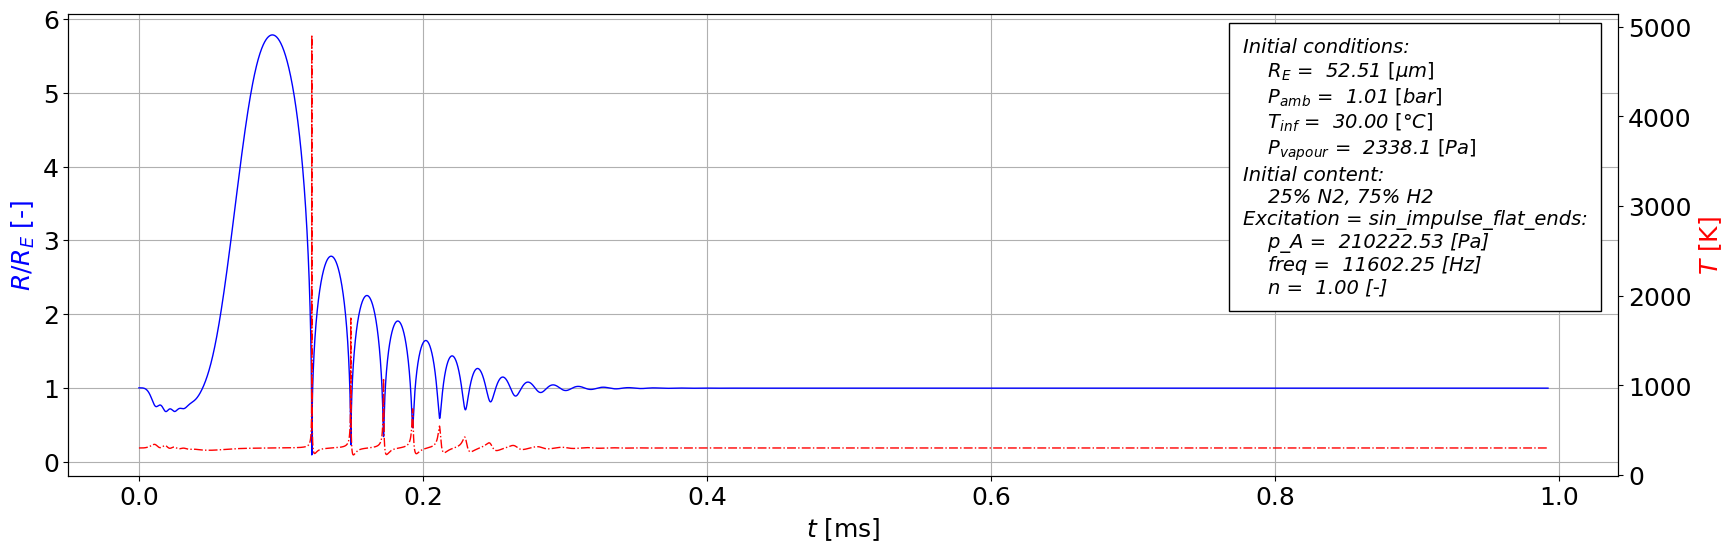

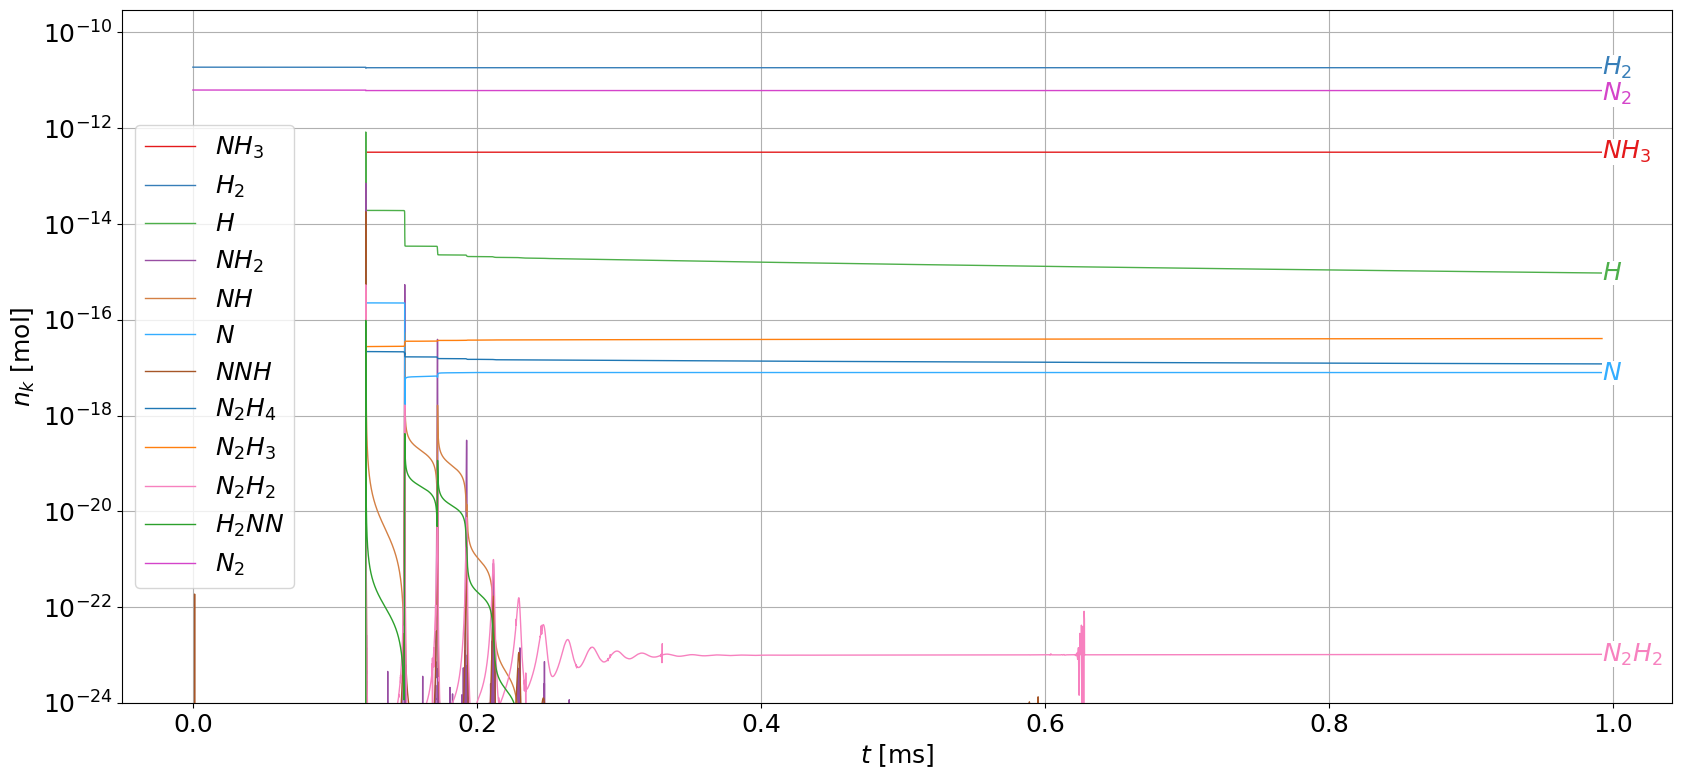

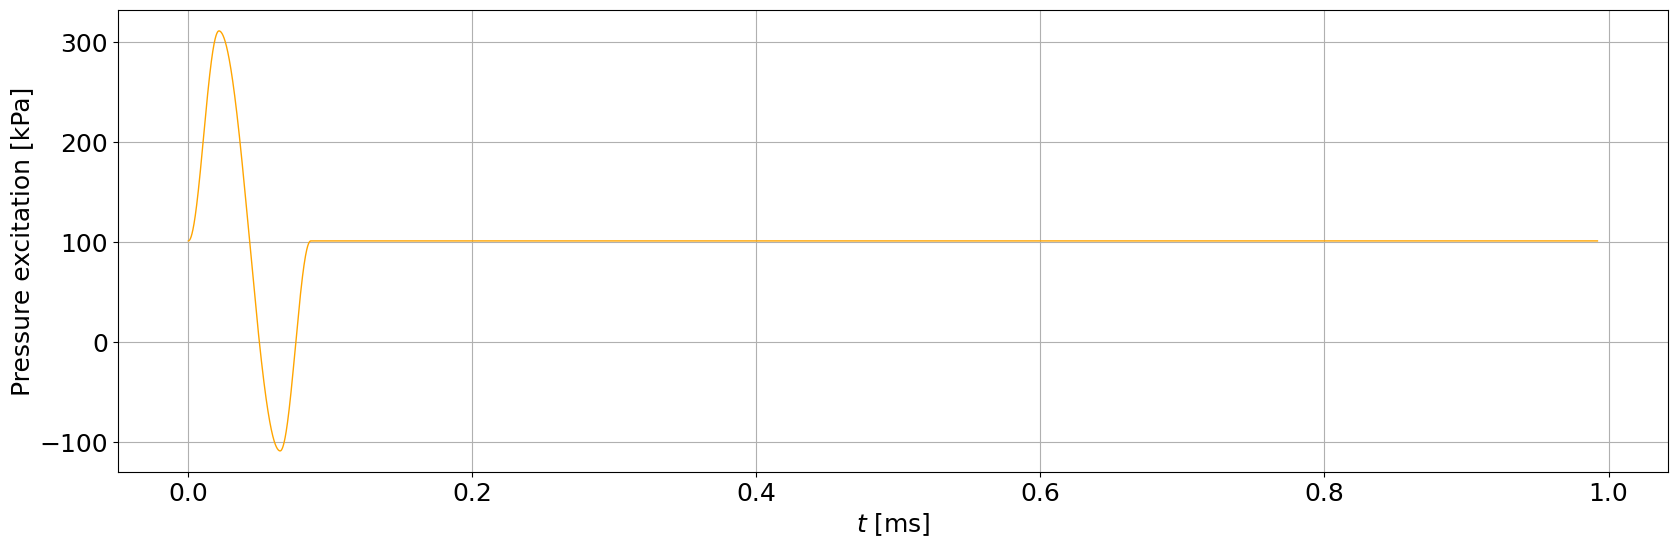

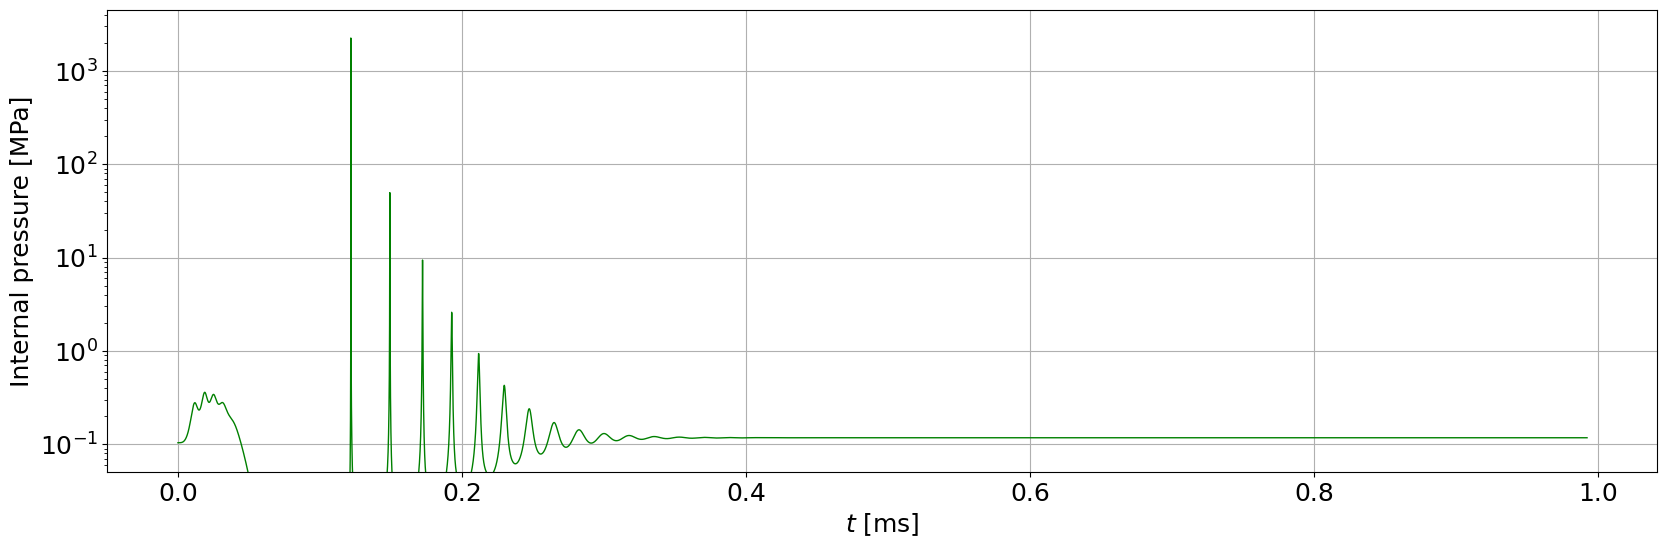

Control parameters:
    ID = 3353,                                   # ID of control parameter (not used during calculation)
  # Initial conditions:
    R_E =  0.00005251,                           # bubble equilibrium radius [m]
    ratio =  1.00,                               # initial radius / equilibrium radius R_0/R_E [-]
    gases = [par.index['N2'], par.index['H2']],  # indexes of species in initial bubble (list of species indexes)
    fractions = [0.25, 0.75],                    # molar fractions of species in initial bubble (list of fractions for every gas)
  # Ambient parameters:
    P_amb =  101325.00,                          # ambient pressure [Pa]
    T_inf =  303.15,                             # ambient temperature [K]
  # Liquid parameters:
    alfa_M =  0.3500,                            # water accommodation coefficient [-]
    P_v =  2338.10,                              # vapour pressure [Pa]
    mu_L =  0.0010,                              # dynamic viscosity [Pa*

In [58]:
"""Plot a certain simulation"""

# converts a line of all_data to a dictionary containing the control parameters (cpar)
def line_to_dict(line):
    # check 'full_bubble_model.py' settings
    if (de.enable_heat_transfer != line['enable_heat_transfer'] or
        de.enable_evaporation != line['enable_evaporation'] or
        de.enable_reactions != line['enable_reactions'] or
        de.enable_dissipated_energy != line['enable_dissipated_energy'] or
        de.target_specie != line['target_specie'] or
        de.excitation_type != line['excitation_type']):
        print(colored(f'Error: the settings of \'full_bubble_model.py\' do not match the current settings', 'red'))

    gases = str(line['gases'])
    gases = [int(index) for index in gases.split(' ') if index != '']
    fractions = str(line['fractions'])
    fractions = [float(frac) for frac in fractions.split(' ') if frac != '']

    cpar = de.dotdict(dict(
        ID = line['ID'],                  # ID of control parameter (not used during calculation)
    # Initial conditions:
        R_E = line['R_E'],                # bubble equilibrium radius [m]
        ratio = line['ratio'],            # initial radius / equilibrium radius R_0/R_E [-]
        gases = gases,                    # indexes of species in initial bubble (list of species indexes)
        fractions = fractions,            # molar fractions of species in initial bubble (list of fractions for every gas)
    # Ambient parameters:
        P_amb = line['P_amb'],            # ambient pressure [Pa]
        T_inf = line['T_inf'],            # ambient temperature [K]
    # Liquid parameters:
        alfa_M = line['alfa_M'],          # water accommodation coefficient [-]
        P_v = line['P_v'],                # vapour pressure [Pa]
        mu_L = line['mu_L'],              # dynamic viscosity [Pa*s]
        c_L = line['c_L'],                # sound speed [m/s]
        surfactant = line['surfactant'],  # surfactant (surface tension modfier) [-]
    ))

    # Excitation parameters:
    for arg in de.excitation_args:
        cpar[arg] = line[arg]

    return cpar

cpar = line_to_dict(good_data.iloc[0])   # choose the most energy efficient one
de.plot(cpar, plot_pressure=True, show_legend=True, t_int=[0.0, 0.001])